IMPORTING THE PACKAGES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

UPLOADING THE FISHDATASET IN DF

In [5]:
df=pd.read_csv("/content/167541727261160ec2379f8793842aa5b168a_ (1).csv")
df.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 1. Plot a bar chart showing count of individual species?


<Axes: xlabel='count', ylabel='Species'>

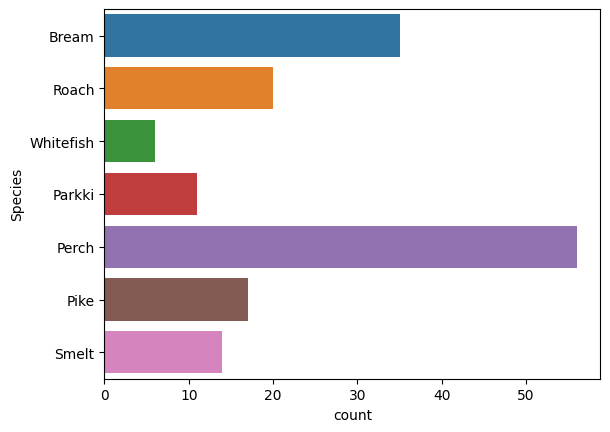

In [6]:
### 1. Plot a bar chart showing count of individual species?

sns.countplot(data=df,y="Species",orient="h")



In [7]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

 BOXPLOT

<Axes: >

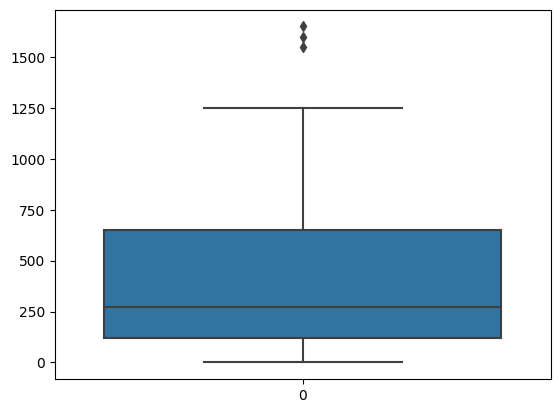

In [8]:
### 2. Identify outliers and remove if any?
# Box Plot
import seaborn as sns
sns.boxplot(df['Weight'])

FINFING NUMBER OF COLUMNS AND ROWS

In [ ]:
df.shape

(159, 7)

FINDIN AND REMOVING OUTLIERS

In [11]:
Q1 = np.percentile(df['Weight'], 25, method='midpoint')##percentile of 25%
Q3 = np.percentile(df['Weight'], 75, method='midpoint')##percentile of 75%
IQR = Q3 - Q1
print(IQR)

upper_bound = Q1 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

df_new = df[(df.Weight>lower_bound)&(df.Weight<upper_bound)]
df_new

530.0
915.0
-145.0


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


FINDING THE NULL VALUES

In [ ]:
### 3. Build a regression model and print regression equation?
df_new.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

INSIGTHS

> There is no null values in our dataset

> Each columns has zeero null values





CHECKING MULTICOLLINEARITY

In [ ]:
corr=df_new.corr()

<ipython-input-23-635f8c289670>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_new.corr()


<Axes: >

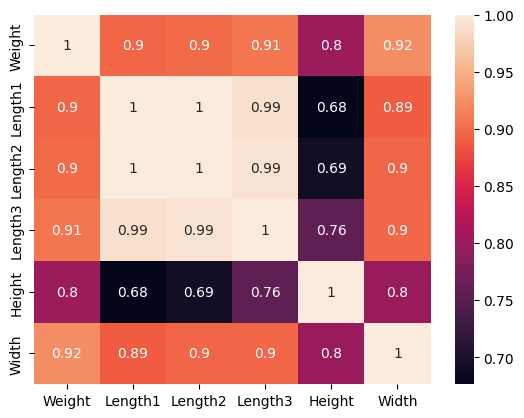

In [ ]:
sns.heatmap(data=corr,annot=True)



>According to domain knowlege,check the relationship between the variables

> if the correlation are high then remove the column


> But here the features are less in number so im not removing any feature







CONVERTING CATEGORICAL VARIABLE TO NUMERICAL BY CREATING DUMMIES

In [ ]:
df=pd.get_dummies(df)

In [ ]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


DIVIDING THE DATA INTO INDEPENDENT AND TARGET VARIABLE

In [ ]:
x=df.iloc[:,:]
y=df.iloc[:,0]

x=x.drop(['Weight'], axis=1)
print(x)

     Length1  Length2  Length3   Height   Width  Species_Bream  \
0       23.2     25.4     30.0  11.5200  4.0200              1   
1       24.0     26.3     31.2  12.4800  4.3056              1   
2       23.9     26.5     31.1  12.3778  4.6961              1   
3       26.3     29.0     33.5  12.7300  4.4555              1   
4       26.5     29.0     34.0  12.4440  5.1340              1   
..       ...      ...      ...      ...     ...            ...   
154     11.5     12.2     13.4   2.0904  1.3936              0   
155     11.7     12.4     13.5   2.4300  1.2690              0   
156     12.1     13.0     13.8   2.2770  1.2558              0   
157     13.2     14.3     15.2   2.8728  2.0672              0   
158     13.8     15.0     16.2   2.9322  1.8792              0   

     Species_Parkki  Species_Perch  Species_Pike  Species_Roach  \
0                 0              0             0              0   
1                 0              0             0              0   
2     



> In this dataset, weight is target variable.so,it is stored in y.

> Remaing are stored in x





importing train_test_split from sklearn package to divide the datset for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

converting the units of all the features into common unit

In [ ]:
from sklearn.preprocessing import StandardScaler
scler=StandardScaler()
x_train=scler.fit(x_train)
x_test=scler.fit(x_test)

Creating Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()



> The model is trained by linear regression algorithm.

> the splited x_train and y_train is used to train the regression model






value is predicted using  the model for x_test datas

In [ ]:
y_pred=model.predict(x_test)

Performance of the model is determined using R2_SCORE

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9379921317795368


Finding the coefficient and intercept for each data points

In [ ]:
### linear regression equation
print("y=mx+c")

y=mx+c


In [ ]:
intercept=model.intercept_
intercept


-776.7870026915732

In [ ]:
coef=model.coef_
coef

array([ -74.08925541,   80.95822875,   29.25889829,  -14.96326281,
          9.93320646,  -11.39817506,  117.70238957,   11.46537802,
       -375.38219364,  -10.14785401,  269.60363967,   -1.84318453])

In [ ]:
c1 = df["Length1"]
c2 = df["Length2"]
c3 = df["Length3"]
c4 = df["Height"]
c5 = df["Width"]

In [ ]:
equation = print(f"equation = ({coef}{c1}+{coef}{c2}+{coef}{c3}+{coef}{c4}+{coef}*{c5})+{intercept}")
print(equation)

equation = ([ -74.08925541   80.95822875   29.25889829  -14.96326281    9.93320646
  -11.39817506  117.70238957   11.46537802 -375.38219364  -10.14785401
  269.60363967   -1.84318453]0      23.2
1      24.0
2      23.9
3      26.3
4      26.5
       ... 
154    11.5
155    11.7
156    12.1
157    13.2
158    13.8
Name: Length1, Length: 159, dtype: float64+[ -74.08925541   80.95822875   29.25889829  -14.96326281    9.93320646
  -11.39817506  117.70238957   11.46537802 -375.38219364  -10.14785401
  269.60363967   -1.84318453]0      25.4
1      26.3
2      26.5
3      29.0
4      29.0
       ... 
154    12.2
155    12.4
156    13.0
157    14.3
158    15.0
Name: Length2, Length: 159, dtype: float64+[ -74.08925541   80.95822875   29.25889829  -14.96326281    9.93320646
  -11.39817506  117.70238957   11.46537802 -375.38219364  -10.14785401
  269.60363967   -1.84318453]0      30.0
1      31.2
2      31.1
3      33.5
4      34.0
       ... 
154    13.4
155    13.5
156    13.8
157    15.2
158  

The mean score of the model at 95% confidence interval?

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, x, y, cv=5)

# Calculate the mean score
mean_score = scores.mean()
confidence_interval = 1.96 * scores.std() / (len(scores) ** 0.5)

print(f"Mean score at 95% confidence interval: {mean_score:.3f} +/- {confidence_interval:.3f}")

Mean score at 95% confidence interval: -1.722 +/- 4.122


Compare real and predicted weights and give a conclusion statement based on it?

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9379921317795368


from the above model the accuracy of model is 93%